In [1]:
import pandas as pd

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [3]:
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

In [4]:
pima.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = pima[feature_cols]
y = pima.label

In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000, penalty = 'none')
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='none')

In [8]:
y_pred=logreg.predict(X_test)

In [9]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]], dtype=int64)

In [10]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

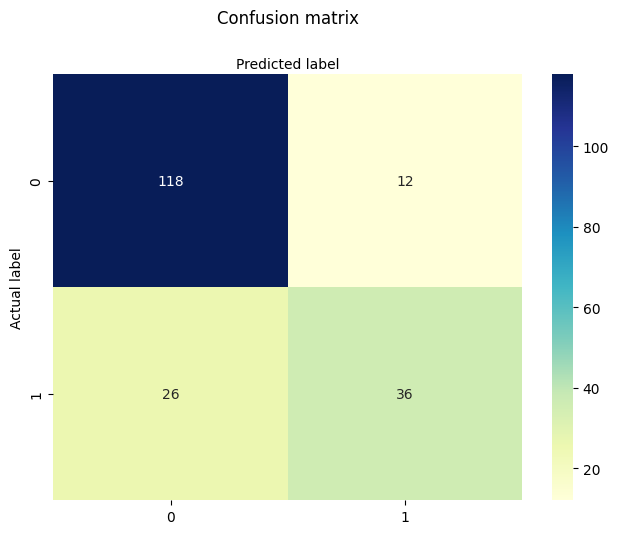

In [11]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8020833333333334
Precision: 0.75
Recall: 0.5806451612903226


In [13]:
print(logreg.coef_)

[[ 0.0869272   0.03320333 -0.01119464  0.00587713 -0.00102961  0.08797054
   0.89352054  0.02201611]]


In [14]:
print(logreg.intercept_)

[-8.42101782]


In [15]:
import statsmodels.api as sm
X_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_const)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.482517
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                  576
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            8
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:                  0.2600
Time:                        11:38:46   Log-Likelihood:                -277.93
converged:                       True   LL-Null:                       -375.58
Covariance Type:            nonrobust   LLR p-value:                 6.246e-38
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4218      0.822    -10.240      0.000     -10.034      -6.810
pregnant       0.0869      0.

In [16]:
#feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
new_patients = {'pregnant':[1,3,8],
               'glucose':[115,126,99],
               'bp':[70,88,84],
               'skin':[30,41,0],
               'insulin':[96,235,0],
               'bmi':[34.6,39.3,35.4],
               'pedigree':[0.529,0.704,0.388],
               'age':[32,27,50]}
df_new_patients = pd.DataFrame(new_patients, columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age'])

In [17]:
y_pred=logreg.predict(df_new_patients)

print (df_new_patients)
print (y_pred)

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age
0         1      115  70    30       96  34.6     0.529   32
1         3      126  88    41      235  39.3     0.704   27
2         8       99  84     0        0  35.4     0.388   50
[0 0 0]
